In [1]:
using Flux, BSON, Plots

In [4]:
d = 20
plot_x = plot_y = range(-1, stop=1, length=40)
pyplot(leg=true)

Plots.PyPlotBackend()

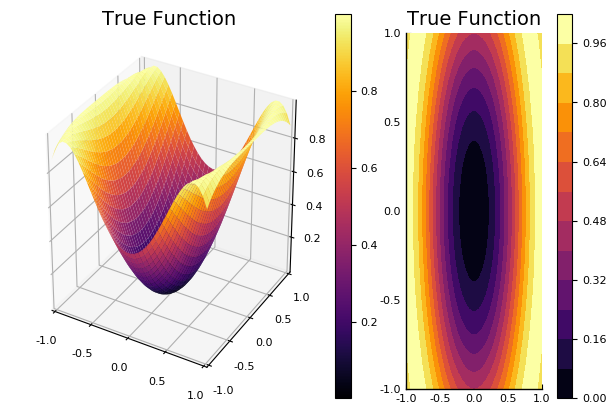

In [15]:
l1 = @layout [a{0.7w} b]
u_true(x) = sin.((π .* view(x, 1, :, :) .^ 2 + view(x, 2, :, :) .^ 2) ./ 2)
u_true_plot(x, y) = u_true(vcat(x, y))[1]
p1 = plot(plot_x, plot_y, u_true_plot, st = [:surface, :contourf], layout=l1, title="True Function", format=:png)
savefig(p1, "True_function.png")

In [6]:
u_theta_plot(x, y) = uθ(vcat(x, y, zeros(Float32, d -2, 1))).data[1]

u_theta_plot (generic function with 1 method)

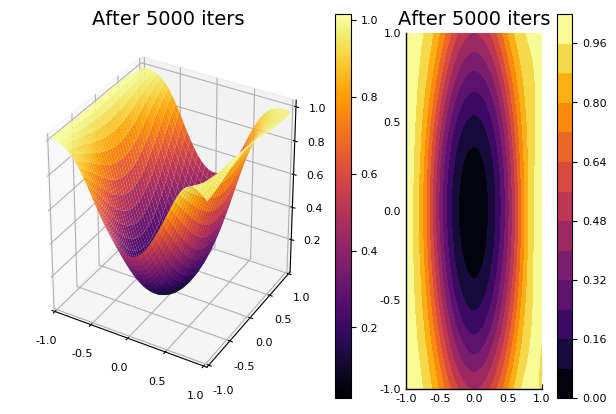

In [16]:
uθ = BSON.load("../wt_20/primal5000.bson")[:u1]
l2 = @layout [a{0.7w} b]
p1 = plot(plot_x, plot_y, u_theta_plot, st = [:surface, :contourf], layout=l2, title="After 5000 iters", format=:png)
savefig(p1, "After_5000_Iters.png")

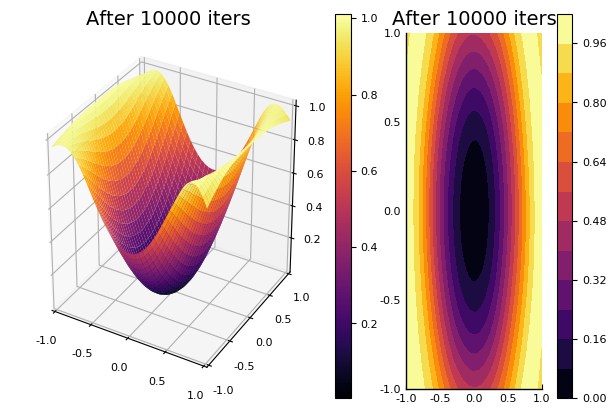

In [17]:
uθ = BSON.load("../wt_20/primal10000.bson")[:u1]
l2 = @layout [a{0.7w} b]
p1 = plot(plot_x, plot_y, u_theta_plot, st = [:surface, :contourf], layout=l2, title="After 10000 iters")
savefig(p1, "After_10000_Iters.png")

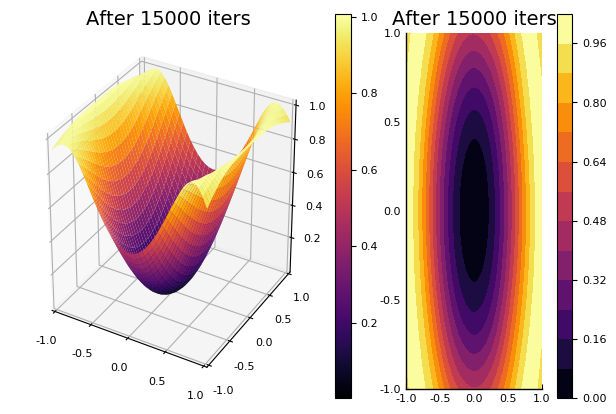

In [18]:
uθ = BSON.load("../wt_20/primal15000.bson")[:u1]
l2 = @layout [a{0.7w} b]
p1 = plot(plot_x, plot_y, u_theta_plot, st = [:surface, :contourf], layout=l2, title="After 15000 iters")
savefig(p1, "After_15000_Iters.png")

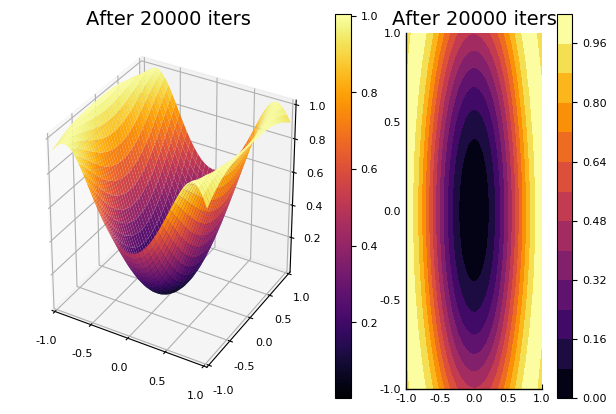

In [19]:
uθ = BSON.load("../wt_20/primal20000.bson")[:u1]
l2 = @layout [a{0.7w} b]
p1 = plot(plot_x, plot_y, u_theta_plot, st = [:surface, :contourf], layout=l2, title="After 20000 iters")
savefig(p1, "After_20000_Iters.png")

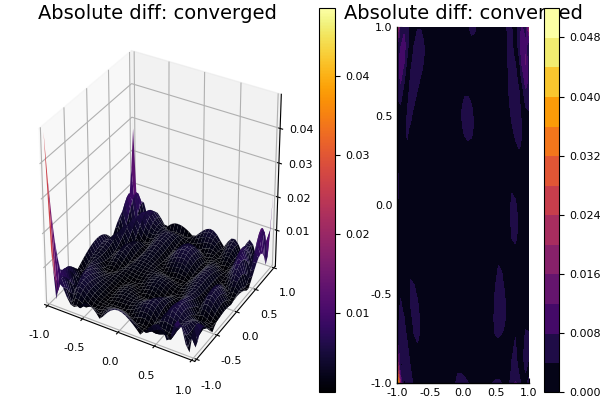

In [12]:
uθ = BSON.load("../wt_20/primal20000.bson")[:u1]
l3 = @layout [a{0.7w} b]
plot_x = plot_y = range(-1, stop=1, length=40)
absolute_difference(x, y) = abs(u_theta_plot(x, y) - u_true_plot(x,y))
plot(plot_x, plot_y, absolute_difference, st = [:surface, :contourf], layout=l3, title="Absolute diff: converged")

In [13]:
max_diff = 0.0
pts = (-1, -1)
for x in plot_x, y in plot_y
    (abs(x) == 1.0 || abs(y) == 1.0) && continue # Taking inside the region
    diff = absolute_difference(x, y)
    diff <= max_diff && continue
    max_diff = diff
    pts = (x, y)
end
pts = Float32.(pts)
println("Maximum absolute difference inside the region = $(Float32(max_diff)) | at point $(pts)")

Maximum absolute difference inside the region = 0.012106698 | at point (0.94871795f0, 0.7948718f0)
